In [ ]:
try:
    # core libraries
    %tensorflow_version 2.x
    import tensorflow as tf
    import numpy as np
    from sklearn.model_selection import GridSearchCV 

    # keras tensorflow
    import tensorflow.keras as keras

    # plot libraries
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline

except Exception:
    print('Tensorflow version 2 not available')

# First steps in Deep Learning with Keras 

## 1. Playing with Tensorflow playground

Rendez vous dans un autre onglet de votre navigateur sur la page [http://playground.tensorflow.org/](http://playground.tensorflow.org/). Cette interface vous permet de designer un réseau de neurones sur différents  problèmes artificiels (données générées selon des lois connues) en dimension 2 et de se familiariser avec les capacités de ces modèles. Il y a 4 jeux de données, (Les deux couronnes, Le XOR, les 2 gaussiennes, et les spirales). Vous pouvez tirer au hasard un échatillon de données pour le jeu de données choisi, choisir un bruit, et specifier la taille de la base d'apprentissage.  


1.   Étude des "bonnes" caractéristiques pour un problème donné

Sélectionnez le jeu de données des 2 gaussiennes. Choisissez un réseau sans couche cachée. Réglez les paramètres tels que le pas de gradient (learning rate) et la focntion d'activation jusqu'à ce que voua rriviez à un bonne sépartion des 2 classes. Selectionnez maintenant un autre jeu de données, le XOR. VOtre modèle de peut pas obtenir de bonnes performances. Ajoutéez en entrée du modèle de nouvelles caractéristiques comme $x_1 x_2$ et réentrainez votre modèle. Testez ce modèle sur le jeu de données des deux couronnes. Maintenant pour ce dernier jeu de données, enlevez la caaracteristique $x_1 x_2$ et rajoutez les caraceristiques $x_1^2$ et $x_2^2$. Réapprenez puis testez ce modèle en ajustant les hyperparamètres sur le jeu de données XOR. Que concluez vous ? Cherchez à construire maintenant un modèle de réseau de neurones capable de bien fntionner sur les deux jeux de données XOR et Les Deux couronnes. 

2. Réglage du pas de gradient et des fonctions d'activation

Sur un problème de votre choix mettez en évident le role du pas de gradient et les possibilités de divergence de l'apprentissage de votre modèle, ainsi que le role des fonctions d'activation (par ex. Relu vs Tanh). 



3. Surapprentissage

Mettez en évidence un phénomène de surapprentissage. Par exemple sélectionnez le jeu de données des 2 gaussiennes, augmentez le niveau de bruit pour que les données deviennent non linéairement séparables pour quelques points seulement et utilisez des classifieurs complexes (plusieurs couches cachées, 5 à 8 neurones sur toutes les couches). Notez les loss en train et en test dans différentes configurations. Testez des fonctions d'activation linéaires, soit tanh, soit relu. Qu'observez vous ? 

4. La régularisation L2 est une technique classiquement utilisée pour éviter les problèmes de surapprentissage. Sur un cas de surapprentissage que vous avez identifié essayez de régler la régularisation pour étudier si bous poivez l'éviter.





In [ ]:
#bien
#http://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0.01&noise=50&networkShape=4,8,2&seed=0.03330&showTestData=false&discretize=false&percTrainData=60&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false

#surapprentissage
#http://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=30&networkShape=8,8,8,8,8,2&seed=0.77080&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

#
#http://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0.01&noise=0&networkShape=4,8,2&seed=0.77584&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false

## 2. Useful docs

### Notebooks

Allez voir
- http://dichotomies.fr/2015/informatique/info1/cours/debuter-avec-les-notebooks/
- https://blog.wax-o.com/2014/04/tutoriel-un-guide-pour-bien-commencer-avec-markdown/

### Managing Plots

* You need to import pyplot for plotting curves and graphics
* The following command *%matplotlib inline* makes the plots will appear in this webpage
* If you want to save plots on a machine without display (e.g. cluster etc) you must add the command *matplotlib.use('Agg')* between the two following commands.

```
import matplotlib.pyplot as plt
%matplotlib inline
```

### Deep learning with Keras

#### First steps with Keras 

- Doc keras :https://keras.io/
- The Sequential model : https://keras.io/getting-started/sequential-model-guide/#getting-started-with-the-keras-sequential-model
- A richer framework : https://keras.io/getting-started/functional-api-guide/

#### Autres Toolkits et package

- Lasagne : Langage *de haut niveau* comme keras


NB : Lasagne et Keras utilisent indifférement un backend parmi Theano (Univ. Montreal) et Tensorflow (Google)

- Theano :  le package de l'Univ. de Montréal

- Tensorflow :  le package Google

- Caffe : très spécialisé images

- Pytorch : la plateforme de Facebook

- ...


## 3. Importing Mnist dataset (and normalizing it)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
n_classes = 10

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# On transforme les entrée en les vectorisant et on les normalise simplement
# (on sait que les pixels ont des valeurs entre 0 et 255)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

# On transforme l'image carrée (28, 28) en un seul vecteur (784)
# à noter qu'on pourrait aussi ajouter une couche `Flatten` à l'entrée de
# notre réseau de neurones, ce qui produira le même effet
x_train = x_train.reshape((x_train.shape[0], np.prod(x_train.shape[1:])))
x_test = x_test.reshape((x_test.shape[0], np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [ ]:
# On transforme les sorties (numéros de classe)
# en des vecteurs de type one-hot-code

#Y_train = y_train
#Y_test = y_test

y_train =  keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## 4. Learning a MLP for Mnist classification


### Creation d'un modèle

On ajoute les couches une à une. Ici un modèle qui 
- prend en entrée un vecteur de dimension 784 (une image Mnist 28x28 bectorisée)
- transforme l'entrée en un vecteur de dimension 64 avec une couche totalement connectée (Dense), suivie d'une activation de type Rectified Linear Unit 
- Transforme la sortie de la couche précédente (de dimension 64) en un vecteur de dimension 10 avec une autre couche dense
- Transforme le vecteur de dimenbsion 10 en un autre vecteir de dimension 10 avec la fonction d'activation softmax

Puis on compile le modèle en précisant
- le critère d'optimisation, le loss
- la routine d'optimisation, l'optimizer
- les métriques additionnelles que l'on va calculer diffrentes du loss


In [ ]:
def get_model_1(input_shape, n_classes, n_neurons, optimizer, has_dropout=True):
    _model = keras.Sequential()

    # first hiden layer
    # if the input given is not flattened, do it, otherwise just add dense layer
    if isinstance(input_shape, tuple):
        _model.add(keras.layers.Flatten(input_shape=input_shape))
        _model.add(keras.layers.Dense(n_neurons, activation='relu'))
    else:
        _model.add(keras.layers.Dense(n_neurons,
                                      input_shape=(input_shape, ),
                                      activation='relu'))
    
    if has_dropout:
        _model.add(keras.layers.Dropout(0.5))
    
    # second hiden layer
    _model.add(keras.layers.Dense(n_neurons, activation='relu'))
    if has_dropout:
        _model.add(keras.layers.Dropout(0.5))
    
    # prediction layer
    _model.add(keras.layers.Dense(n_classes, activation='softmax'))
    
    _model.compile(loss='categorical_crossentropy',
                   optimizer=optimizer,
                   metrics=['accuracy'])
    
    return _model

### Affichage de la structure du modèle

Expliquez les différentes éléments de chacune des lignes affichées par la commande suivante.

In [ ]:
model_1 = get_model_1(input_shape=x_train.shape[1],
                     n_classes=n_classes,
                     n_neurons=784,
                     optimizer='adam',
                     has_dropout=True)
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dropout_2 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               615440    
_________________________________________________________________
dropout_3 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________


### On peut maintenant apprendre le modèle en précisant 
- La base d'apprentissage = les deux premiers paramètres
- le nombre d'itérations d'apprentissage
- la taille des minibatchs
- un ensemble de validation (soit d'autres jeux de données soit on utilise un pourcentage du train). 
On aurait pu utiliser: *validation_data=(x_test, y_test),* comme paramètre de la méthode *fit*
- le niveau de verbosité de l'affichage

In [ ]:
BATCH_SIZE = 16
EPOCHS = 2
VALIDATION_SPLIT = 0.33

In [ ]:
history = model_1.fit(x_train, y_train,
                      epochs=EPOCHS,
                      batch_size=BATCH_SIZE,
                      validation_split=VALIDATION_SPLIT,
                      verbose=1)

Train on 40199 samples, validate on 19801 samples
Epoch 1/2
40199/40199 [==============================] - 10s 257us/sample - loss: 0.3374 - accuracy: 0.8980 - val_loss: 0.1406 - val_accuracy: 0.9563
Epoch 2/2
40199/40199 [==============================] - 10s 238us/sample - loss: 0.2065 - accuracy: 0.9404 - val_loss: 0.1286 - val_accuracy: 0.9629


### On peut maintenant évaluer la performance du modèle sur la base de test

In [ ]:
score = model_1.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=2)
print(score)

10000/1 - 1s - loss: 0.0822 - accuracy: 0.9652
[0.11651406228714623, 0.9652]


### On récupère des informations sur l'apprentissage dans *history*

Le code suivant prend un historique et affiche des courbes d'apprentissage, une pour le loss utilisé pour l'optmisation, l'autre pour l'accuracy


In [ ]:
def plot_learning_curves(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

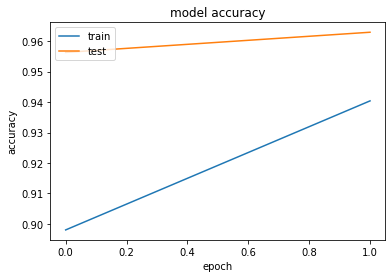

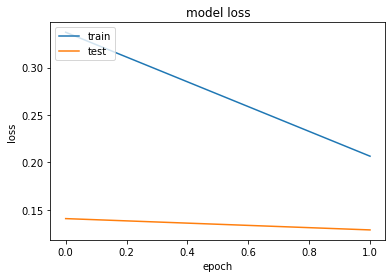

In [ ]:
plot_learning_curves(history)

### Callbacks

Permet de programmer la sauvegarde des modèles a chaque itération, l'adaptation du learning rate, une procédure de early stopping etc

Voir <https://keras.io/callbacks/>



Train on 40199 samples, validate on 19801 samples
Epoch 1/2
40199/40199 [==============================] - 10s 237us/sample - loss: 0.1805 - accuracy: 0.9479 - val_loss: 0.1172 - val_accuracy: 0.9675
Epoch 2/2
40199/40199 [==============================] - 10s 240us/sample - loss: 0.1617 - accuracy: 0.9536 - val_loss: 0.1079 - val_accuracy: 0.9688
10000/1 - 1s - loss: 0.0484 - accuracy: 0.9730
[0.09590686385592999, 0.973]


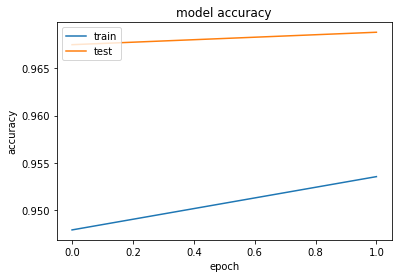

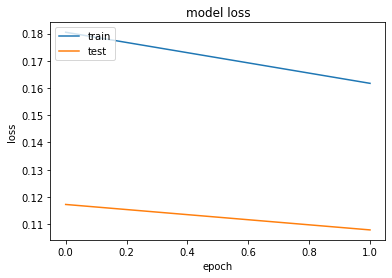

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                               min_delta=0.00001,
                                               patience=10,
                                               verbose=1,
                                               mode='auto')

learning_rate = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                  factor=0.1,
                                                  patience=2,
                                                  verbose=1,
                                                  mode='auto',
                                                  min_delta=0.0001,
                                                  cooldown=0,
                                                  min_lr=0)

history = model_1.fit(x_train, y_train,
                      epochs=EPOCHS,
                      batch_size=BATCH_SIZE,
                      validation_split=VALIDATION_SPLIT,
                      verbose=1,
                      callbacks=[early_stopping, learning_rate])

score = model_1.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=2)
print(score)

plot_learning_curves(history)

## 5. Saving and retrieving models 

### Saving a model and reloading it 

In [ ]:
# Saving the model
filename = 'my_model_1.h5'
model_1.save(filename) # creates a HDF5 file 'my_model_1.h5'
del model_1 # deletes the existing model

# Retrieving the model   
model_1 = keras.models.load_model(filename)

# Test the model
score = model_1.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print(score)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## 6. Embedding Keras in SKLearn (Grid Search / Cross Validation)

* could give a try to `talos` https://github.com/autonomio/talos

In [ ]:
params = {
    'input_shape': [784],
    'n_classes': [10],
    'n_neurons': [784],
    'optimizer': ['adam'],
    'loss': ['categorical_crossentropy'],
    'dropout_rate': [0, 0.5],
}

EPOCHS = 50

def get_model_2(input_shape, n_classes, n_neurons, optimizer, loss, dropout_rate):
    _model = keras.Sequential()

    # first hiden layer
    # ---
    # if the input given is not flattened, do it then add first dense layer
    # else just add first dense layer
    if isinstance(input_shape, tuple):
        _model.add(keras.layers.Flatten(input_shape=input_shape))
        _model.add(keras.layers.Dense(n_neurons,
                                      activation='relu'))
    else:
        _model.add(keras.layers.Dense(n_neurons,
                                      input_shape=(input_shape,),
                                      activation='relu'))
    
    _model.add(keras.layers.Dropout(dropout_rate))
    
    # second hiden layer
    _model.add(keras.layers.Dense(n_neurons,
                                  activation='relu'))
    _model.add(keras.layers.Dropout(dropout_rate))
    
    # prediction layer
    _model.add(keras.layers.Dense(n_classes, activation='softmax'))
    
    # compile the model
    _model.compile(loss=loss,
                   optimizer=optimizer,
                   metrics=['accuracy'])
    
    return _model

# converts tf.keras model to sklearn
model_sklearn = keras.wrappers.scikit_learn.KerasClassifier(build_fn=get_model_2)

# grid search
print(params)
grid = GridSearchCV(estimator=model_sklearn, param_grid=params)
grid_result = grid.fit(x_train, y_train,
                       epochs=EPOCHS,
                       batch_size=BATCH_SIZE,
                       validation_split=VALIDATION_SPLIT,
                       verbose=1,
                       callbacks=[early_stopping, learning_rate])

# summarize results                                                                                                                                           
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for _params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), _params))

26799/26799 [==============================] - 6s 234us/sample - loss: 0.0641 - accuracy: 0.9809 - val_loss: 0.0896 - val_accuracy: 0.9758
Epoch 9/50
26799/26799 [==============================] - 6s 234us/sample - loss: 0.0575 - accuracy: 0.9821 - val_loss: 0.0907 - val_accuracy: 0.9758
Epoch 10/50
26512/26799 [============================>.] - ETA: 0s - loss: 0.0511 - accuracy: 0.9839
Epoch 00010: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
26799/26799 [==============================] - 6s 237us/sample - loss: 0.0511 - accuracy: 0.9837 - val_loss: 0.0906 - val_accuracy: 0.9756
Epoch 11/50
26799/26799 [==============================] - 6s 234us/sample - loss: 0.0469 - accuracy: 0.9845 - val_loss: 0.0902 - val_accuracy: 0.9761
Epoch 12/50
26784/26799 [============================>.] - ETA: 0s - loss: 0.0476 - accuracy: 0.9848
Epoch 00012: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
26799/26799 [==============================] - 6s 236us/s

## 7. To Do : Mise au point d'un classifieur profond sur les données Mnist

https://www.kaggle.com/c/digit-recognizer


In [ ]:
def create_cnn_model():
    model_local = Sequential()
    #block
    model_local.add(Conv2D(32, kernel_size=3,
                           activation='relu',
                           input_shape=(28, 28, 1)))
    model_local.add(BatchNormalization())
    model_local.add(Conv2D(32, kernel_size=3,
                           activation='relu'))
    model_local.add(BatchNormalization())
    model_local.add(Conv2D(32, kernel_size=5,
                           strides=2,
                           padding='same',
                           activation='relu'))
    model_local.add(BatchNormalization())
    model_local.add(Dropout(0.4))

    # block
    model_local.add(Conv2D(64, kernel_size=3,
                           activation='relu'))
    model_local.add(BatchNormalization())
    model_local.add(Conv2D(64, kernel_size=3,
                           activation='relu'))
    model_local.add(BatchNormalization())
    model_local.add(Conv2D(64, kernel_size=5,
                           strides=2,
                           padding='same',
                           activation='relu'))
    model_local.add(BatchNormalization())
    model_local.add(Dropout(0.4))

    # block
    model_local.add(Conv2D(128, kernel_size=4,
                           activation='relu'))
    model_local.add(BatchNormalization())
    model_local.add(Flatten())
    model_local.add(Dropout(0.4))
    model_local.add(Dense(10, activation='softmax'))

    # on compile avec un optimiseur adam et une loss multi-catégories
    model_local.compile(optimizer="adam",
                        loss="categorical_crossentropy",
                        metrics=["accuracy"])
    return model_local

Vous devez :

- Vous enregistrer sur Kaggle
- Récupérer les données de la compétition digit-recognizer 
- Soumettre des prédictions sur les données de test.
- Me fournir par mail d'ici la prochaine séance votre login Kaggle et la performance que vous avez obtenue.

Pour cela vous pourrez suivre, notamment, les pistes évoquées ci-dessous (non exclusives). 

Dans tous les cas vous ferez attention à avoir une bonne estimation de la performance en généralisation avant de soumettre un RUN sur Kaggle.

## Piste 1 : Accroître la quantité de données et leur variabilité  

- En bruitant les données (bruit à définir)
- En rajoutant les images miroirs 
- En utilisant les pistes décrites ici  http://leon.bottou.org/projects/infimnist
Vous pourrez utiliser [ImageDataGenerator](https://keras.io/preprocessing/image/) de Keras.

In [ ]:
# on définit un générateur d'augmentation de données avec
# rotation, zoom, décalage en largeur et hauteur
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    width_shift_range=0.1,
    height_shift_range=0.1)

# on sépare le train en train/val avec 90/10 pour estimer l'erreur
# en généralisation
x_train_, x_val_, y_train_, y_val_ = train_test_split(x_train, y_train,
                                                        test_size=0.1)

# on réduit le pas de descente du gradient à chaque époque
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

# on stoppe l'apprentissage si on stagne après un certain nombre
# d'itérations sans amélioration de notre fonction objectif
es = EarlyStopping(monitor='val_loss',
                    min_delta=0.00001,
                    patience=10,
                    verbose=1,
                    mode='auto')

# paramètres conseillés par keras
nb_epochs = 50
batch_size = 64
steps_per_epoch = x_train_.shape[0] // batch_size

# préparation du flow
flow = datagen.flow(x_train_, y_train_, batch_size=batch_size)

# apprentissage !
# model = create_dnn_model()
model = create_cnn_model()
history = model.fit_generator(flow,
                                epochs=nb_epochs,
                                steps_per_epoch=steps_per_epoch,
                                validation_data=(x_val_, y_val_),
                                callbacks=[annealer, es],
                                verbose=1)

# todo plot les courbes d'apprentissage & les erreurs
# à distance sur Pycharm et ssh + X (display)

# prédire pour le test et générer le fichier csv pour la soumission Kaggle
results = np.zeros((x_test.shape[0], 10))
results = results + model.predict(x_test)
results = np.argmax(results, axis=1)
results = pd.Series(results, name="Label")
submission = pd.concat(
    [pd.Series(range(1, 28001), name="ImageId"), results], axis=1)
submission.to_csv("mnist_submission_2.csv", index=False)

## Piste 2 : Exploiter la technique du dropout

En vous inspirant de résultats et d'indications publiés dans 
https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf

La couche de Dropout de Keras est définie [ici](https://keras.io/layers/core/). 
